In [1]:
import pandas as pd
import numpy as np
import json
import peakutils
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

/Users/yuxiwu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/yuxiwu/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/yuxiwu/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0

In [6]:
%run cleaner.py

In [3]:
master = []

for i in ['driving','standing','walking','jumping']:
    df = process_sequence('class-data/' + i + '.txt')
    master += [df]

master = pd.concat(master)
master['activity_factor'] = pd.factorize(master['activity'])[0]
master

,activity,x_accl_mean,x_accl_peaks,x_accl_sd,x_gyro_mean,x_gyro_peaks,x_gyro_sd,x_mag_mean,x_mag_peaks,x_mag_sd,...,z_accl_mean,z_accl_peaks,z_accl_sd,z_gyro_mean,z_gyro_peaks,z_gyro_sd,z_mag_mean,z_mag_peaks,z_mag_sd,activity_factor
0,Driving,-52.752747,491,83.277791,-41.043956,431,70.465838,-679.127473,224,340.716950,...,1367.235165,452,225.292261,279.095055,320,638.275816,318.453297,228,59.456924,0
1,Driving,-50.645733,495,92.015000,-40.779388,428,70.623754,-792.913580,215,365.159978,...,1372.819109,466,196.675695,152.734836,304,558.422473,311.387547,225,72.346449,0
2,Driving,-80.717705,1039,45.667297,-36.715529,735,30.992759,-1080.110688,454,219.059467,...,1331.725320,1025,82.708072,-48.978787,597,219.698806,279.597498,437,90.966503,0
3,Driving,-81.664960,1023,47.322432,-39.318598,734,39.530981,-953.801887,446,186.091941,...,1329.912129,1017,87.806420,-67.157682,651,96.130710,284.756065,420,83.355647,0
4,Driving,-50.220434,866,88.336456,-43.768068,758,75.756427,-763.142576,392,75.108472,...,1364.935611,773,243.216303,-13.279895,584,147.543928,343.838699,365,83.701604,0
5,Driving,-50.490665,882,88.059353,-43.641991,794,67.582279,-760.112021,382,97.906069,...,1360.848018,806,221.054725,-13.969538,583,127.032107,336.819522,343,99.464995,0
6,Driving,-47.604014,819,111.691160,-44.008601,710,66.967687,-709.978018,396,259.426546,...,1365.392482,774,213.819213,145.232877,536,334.231981,368.639694,399,58.820480,0
7,Driving,-54.362620,320,107.143932,-39.924121,283,70.703086,-737.420927,154,225.704066,...,1365.596645,317,182.419901,389.431310,200,491.664103,316.748403,152,36.108018,0
8,Driving,-51.880914,667,84.065410,-37.213295,605,74.585301,-746.060359,315,304.157724,...,1365.621533,618,235.589804,581.084829,416,459.553535,319.507341,304,36.422821,0
9,Driving,-51.664802,682,93.554972,-42.273272,589,70.303989,-863.193767,296,257.862139,...,1368.781862,621,237.052025,68.123452,431,462.935925,273.049940,301,60.257083,0


In [7]:
X_train, X_test, y_train, y_test = splits(master)

In [8]:
C_params = np.logspace(-6, 3, 10)
svc_2 = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    svc_2, X_train.values, y_train.values.flatten(),
    param_name="C", param_range=C_params,
    cv=2, scoring="accuracy", n_jobs=-1)

In [9]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

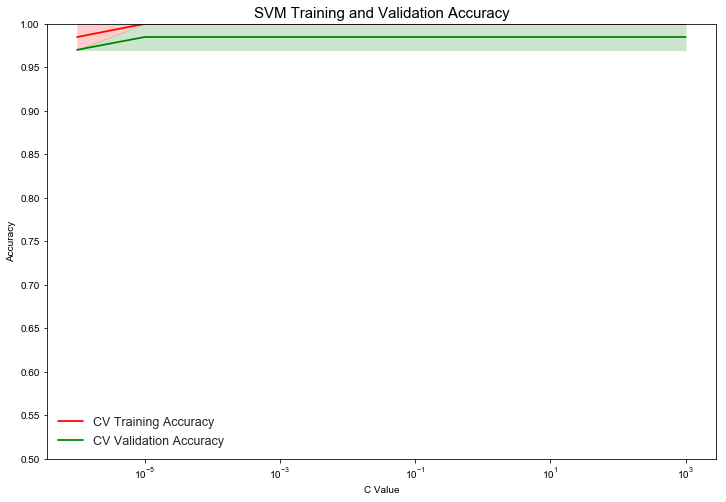

In [10]:
y_min = 0.5
y_max = 1.0

f = plt.figure(figsize = (12, 8))
ax = plt.axes()
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label="CV Training Accuracy", color="red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.semilogx(C_params, test_scores_mean, label="CV Validation Accuracy",
             color="green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()

In [11]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 2, n_jobs = -1)
clf.fit(X_train.values, y_train.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}, {'kernel': ['linear'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [12]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=1.0000000000000001e-05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)
{'C': 1.0000000000000001e-05, 'kernel': 'linear'}
0.9850746268656716


In [13]:
clf.score(X_test, y_test)

1.0

In [14]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [15]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [16]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 2, 1, 2, 2, 3, 3, 3, 0, 3, 1, 3, 2, 0, 1, 1, 3, 1, 1, 1, 2, 0, 3])

In [17]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([1, 2, 1, 2, 2, 3, 3, 3, 0, 3, 1, 3, 2, 0, 1, 1, 3, 1, 1, 1, 2, 0, 3])

In [18]:
accuracy_score(y_test,y_pred)*100

95.652173913043484

In [19]:
accuracy_score(y_test,y_pred_en)*100

95.652173913043484